# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


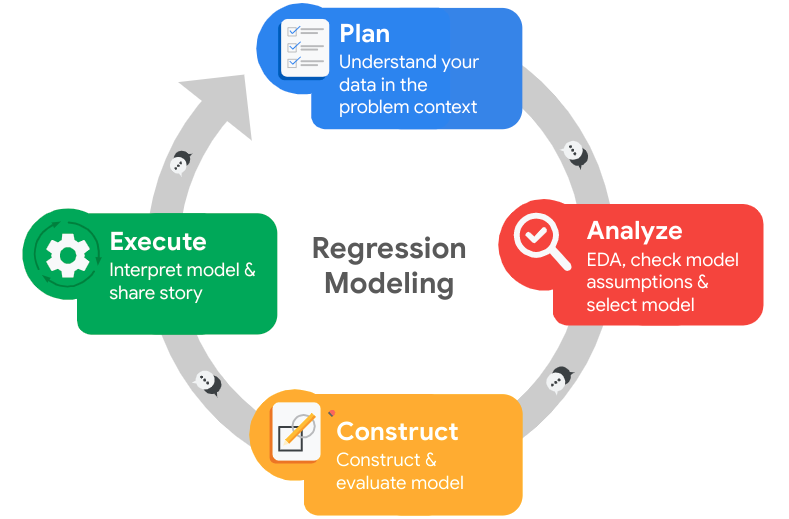

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?  

        Salifort Motors stakeholders
- What are you trying to solve or accomplish?    
    
        We are trying to build model (regression or machine learning) which will predict if Salifort Motors’ employees will leave the company or not
    
- What are your initial observations when you explore the data?     
    
        The dataset for this task is contained 15,000 rows and 10 columns       
        we have 2 (two) categorical data columns, one of them is our target ("left"), the rest values are numeric
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)       

        On-line documentation will be very useful   
- Do you have any ethical considerations in this stage?     
        
        No personal data consist in this dataset, there is no ethical consideration at the moment




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
# general purpose import
import pandas as pd
import numpy as np

# import models and preprocessing tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# import required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# import special function for specific models 
from xgboost import plot_importance

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# save/load models
import pickle

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
#  Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


     According preliminary information we have no missing data in the dataset   
     two categorical variables need to be onehot encoded preliminary if we decide to use it in the models

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


    Some Notes:     

- "time_spend_company": potencially have outliers with 10 years on board, need to check statistic and number of employees with this values    
- "Work_accident" - need to be checked, how many positive class values we have, describe statistic make point to potencial outliers 
- "left" - similar situation as "Work_accident" - need to be checked, how many positive class values we have, describe statistic make point to potencial outliers   
- "promotion_last_5years" - similar situation as "Work_accident" - need to be checked, how many positive class values we have, describe statistic make point to potencial outliers

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [3]:
# Rename columns as needed
df0.rename({"last_evaluation": "employee_performance",
            "number_project": "number_of_projects",
            "average_montly_hours": "average_monthly_hours",
            "time_spend_company": "years_in_company",
            "Work_accident" : "accident_at_work",
            "Department" : "department",
            "salary" : "salary_level"}, axis=1, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'employee_performance', 'number_of_projects',
       'average_monthly_hours', 'years_in_company', 'accident_at_work', 'left',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_in_company         0
accident_at_work         0
left                     0
promotion_last_5years    0
department               0
salary_level             0
dtype: int64

    There are no missing data in the dataset

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

    There are 3008 duplicate rows in the dataset

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_in_company,accident_at_work,left,promotion_last_5years,department,salary_level
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


    We could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [4]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df.head(10)

,satisfaction_level,employee_performance,number_of_projects,average_monthly_hours,years_in_company,accident_at_work,left,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

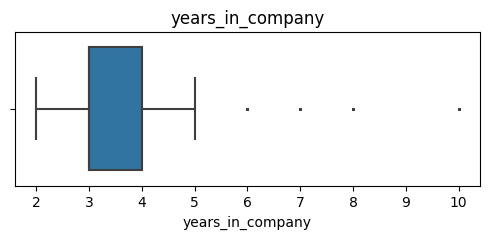

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (6,2))
g = sns.boxplot(data=None, x=df["years_in_company"], fliersize=1)
g.set_title("years_in_company");

In [12]:
# Determine the number of rows containing outliers
(df["years_in_company"] > 5).sum()

824

    There are 824 rows with outliers in "years_in_company" column

    Notes:

- as we are going to build logic regression model, we need to eliminate outliers from our dataset
- for the random forest we can use original "years_in_company" or modified one - it doesn't matter as it is immune to any outliers in the data

In [5]:
# as we are going to build logic regression model, we need to eliminate outliers from our dataset
df1 = df.copy()

# Compute the 25th percentile value in `tenure`
percentile25 = df1["years_in_company"].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1["years_in_company"].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

#deal with outliers
df1.loc[df1["years_in_company"] > upper_limit, "years_in_company"] = 5

Lower limit: 1.5
Upper limit: 5.5


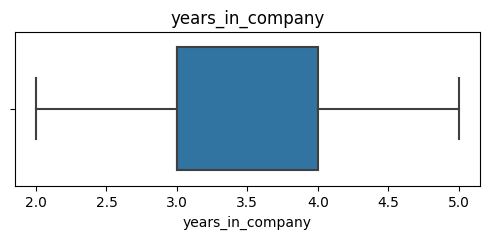

In [81]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (6,2))
g = sns.boxplot(data=None, x=df1["years_in_company"], fliersize=1)
g.set_title("years_in_company");

    Boxplot confirms that all issues with outliers were resolved
    "No extreme outliers" assumption for Logistic Regression is met

In [15]:
df["accident_at_work"].value_counts()

accident_at_work
0    10141
1     1850
Name: count, dtype: int64

In [16]:
df["promotion_last_5years"].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?   

        There are no variables which are highly correlated with each other  

- What do you observe about the distributions in the data?

        We did not create histogram plot for each numeric variable as it was already available for us through thelink to the kaggle site, where all distribution were presented          
        

- What transformations did you make with your data? Why did you chose to make those decisions?

        I transformed categorical data with onehot encoding as we need that in case we will be using these features for models
- What are some purposes of EDA before constructing a predictive model?

        Get familiar with data
        Check for assumption vialations
        check for missing data and adress this issue if required
        check for outliers and adress this issue if required
        Check for duplicates
        Get understanding of variabled relationship and its distribution
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

        descriprion of the dataset at kaggle: https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv
- Do you have any ethical considerations in this stage?

        There is no personal information included in the dataset. No ethical consideration at the moment




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
print("Number of people who left vs stayed:")
print(df["left"].value_counts())

# Get percentages of people who left vs. stayed
df["left"].value_counts(normalize=True)


Number of people who left vs stayed:
left
0    10000
1     1991
Name: count, dtype: int64


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

    There are 83% stay and 17% who left     
    This means that our target variable is imbalanced.  
    We need to keep this proportion when splitting  
    It is also important to note, that our major class is negative, reference accuracy (majore class vote) - 0.833959

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [8]:
df1.columns

Index(['satisfaction_level', 'employee_performance', 'number_of_projects',
       'average_monthly_hours', 'years_in_company', 'accident_at_work', 'left',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

    First of all let's onehot encoded categorical data

In [6]:
# onehot encoded categorical data and saving result as new DataFrame
df2 = pd.get_dummies(df1)

    Let's create and plot correlation matrix, which also help us to check "No multicollinearity" assumption for Logistic Regression

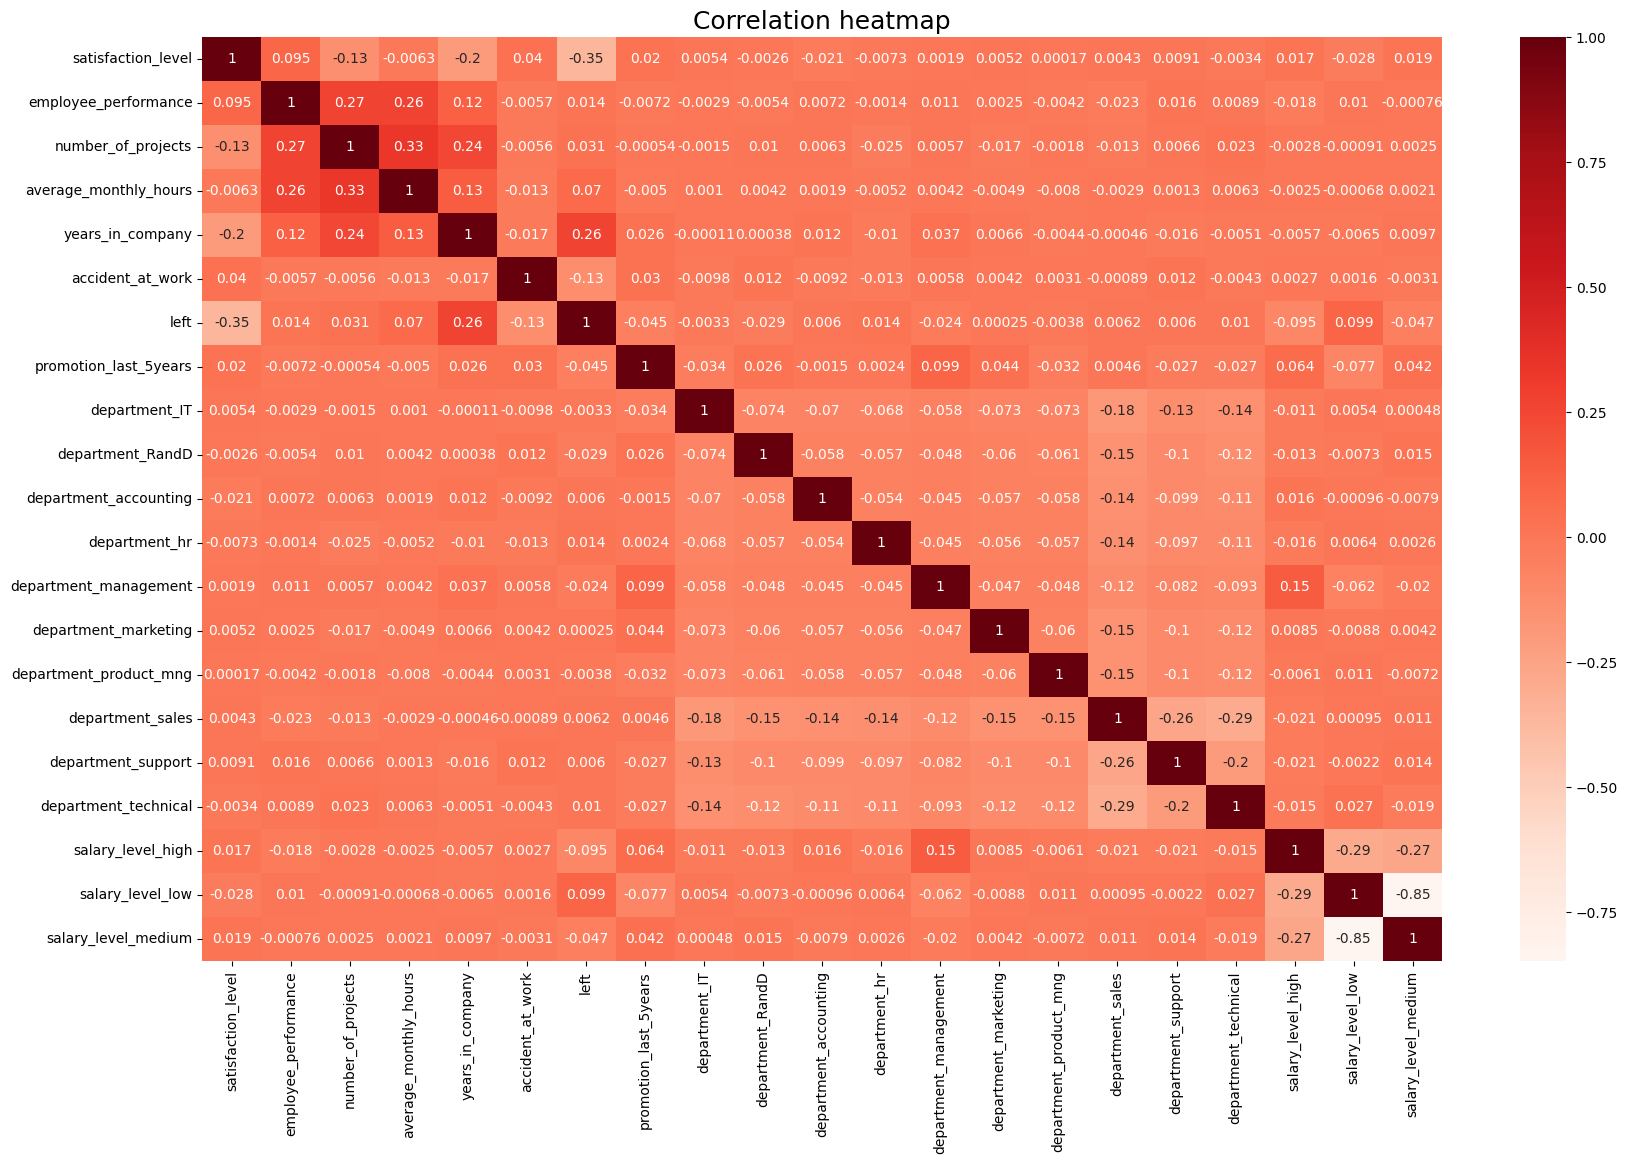

In [11]:
# Create a plot as needed
plt.figure(figsize = (20,12))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds', fmt='.2g')
plt.title('Correlation heatmap', fontsize=18)
plt.show()

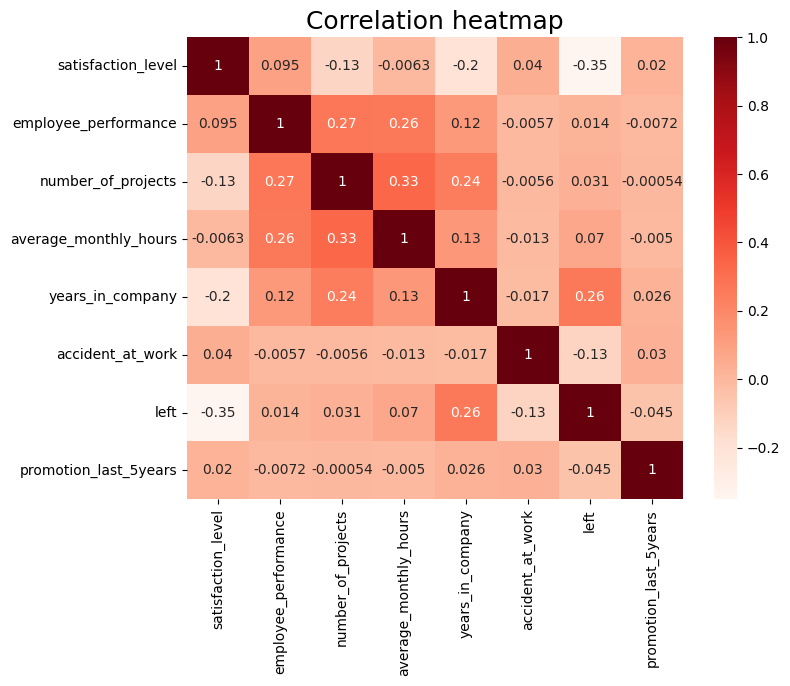

In [12]:
# Create a plot as needed
plt.figure(figsize = (8,6))
sns.heatmap(df1.corr(method='pearson', numeric_only=True), annot=True, cmap='Reds', fmt='.2g')
plt.title('Correlation heatmap', fontsize=18)
plt.show()


    Before proceed we will create two functions:    
    - histogram_plot
    - correlation_plot

    These function make it much easier to create required visualization

In [13]:
def histogram_plot(data, column_name:str, discrete=None):
    plt.figure(figsize=(6,3))
    ax = sns.histplot(data[column_name], discrete=discrete)
    plt.xlabel(column_name)
    plt.title(f"{column_name} histogram");

In [14]:
def correlation_plot(data, column_name:str, target:str, discrete=None):
    plt.figure(figsize=(7,5))
    g = sns.histplot(data=data,
                    x=column_name,
                    hue=target,
                    multiple='dodge',
                    shrink=0.9,
                    discrete=discrete)
    plt.title(f"Class balance for {column_name}");

    There is no high correlation between any variables in the dataset. "No multicollinearity" assumption of the logic regression is met

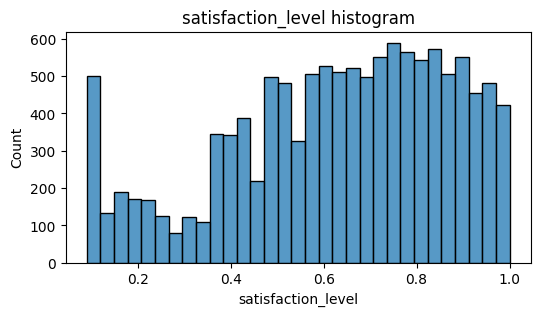

In [72]:
# Create a plot as needed
# histogram for "satisfaction_level":
histogram_plot(df, "satisfaction_level")

    The "satisfaction_level" histogram is left skewed

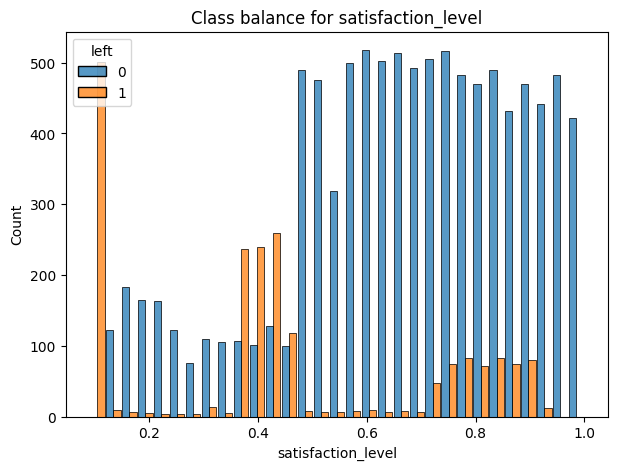

In [73]:
# correlation plot for "satisfaction_level"
correlation_plot(df, column_name="satisfaction_level", target="left")

    No surprise that employee with very low level of satisfaction is more eager to leave    
    Although we can see that with the level of satisfaction around 40% (a liitle bit less than medium) has increased level of quitting employees    
    The second increase of the employee decided to leave around 0.7-0.9 which is kind of strange as if your are near complitely satisfied with your work why should you change your mind and go looking for another job?

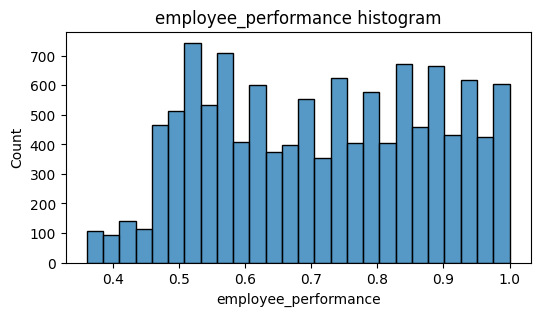

In [15]:
# Create a plot as needed
# histogram for "employee_performance":
histogram_plot(df, "employee_performance")

    The "employee_performance" histogram is almost uniform distributed

    Let's check correlation beyween last performance level and "left" decision

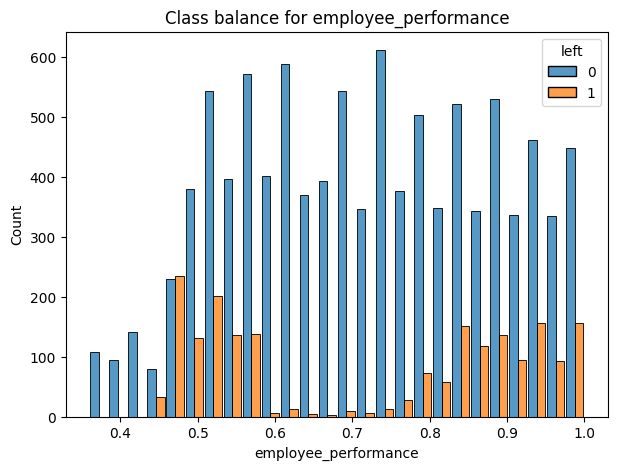

In [16]:
# correlation plot for "employee_performance"
correlation_plot(df, column_name="employee_performance", target="left")

    Again, as we can see, the level of employee who decided to leave the company increasing around 50% (in this case medium level of score for the last performance) and around from 80% to 100%.   
    
    Note that the first increase may suggest that employee performance is mediocre because he kind of "burn our" so did not make effort to do his job better    
    The second increase may suggest that the employee who performance on the highest level or kind of extroordinary, may seek better working condition and salary somwhere else

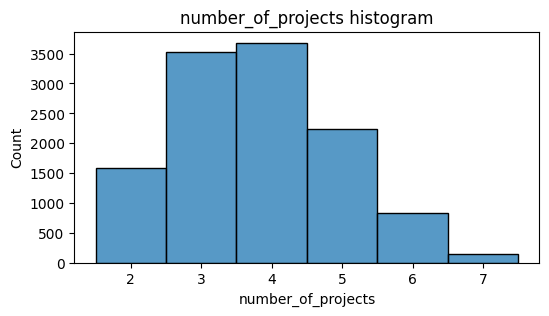

In [75]:
# Create a plot as needed
# histogram for "number_of_projects":
histogram_plot(df, "number_of_projects", True)

    The "number_of_projects" histogram is normal distributed

    Let's check correlation the number of projects and "left" decision

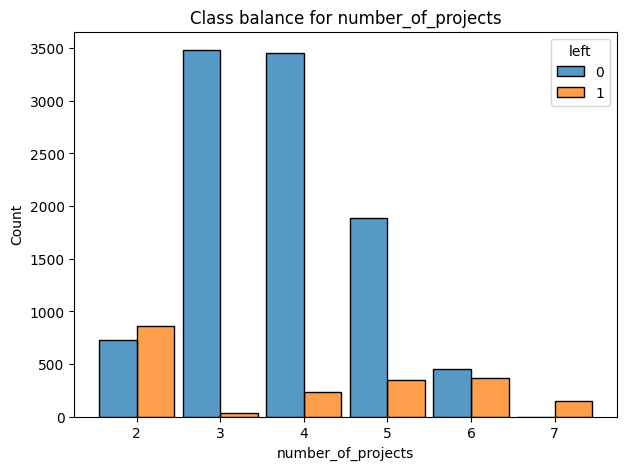

In [76]:
# correlation plot for "number_of_projects"
correlation_plot(df, column_name="number_of_projects", target="left", discrete=True)

    This barplot suggest, that there are no strikt correlation between number of projects and "left" decision, although all employees who had 7 projects (maximum number of the projects in this dataset) left the company.     

    This may lead us to the conclusion that the balance between too little and too much projects for one employee is between 3 - 5 projects

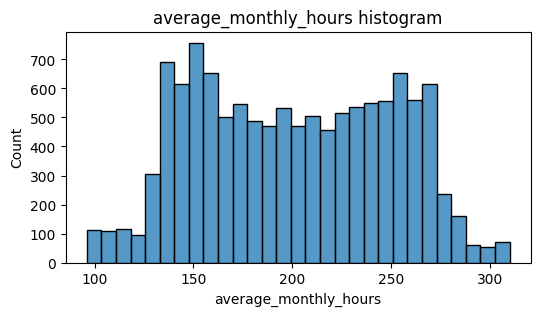

In [77]:
# Create a plot as needed
# histogram for "average_monthly_hours":
histogram_plot(df1, "average_monthly_hours")

    The "average_monthly_hours" histogram is almost uniform distributed

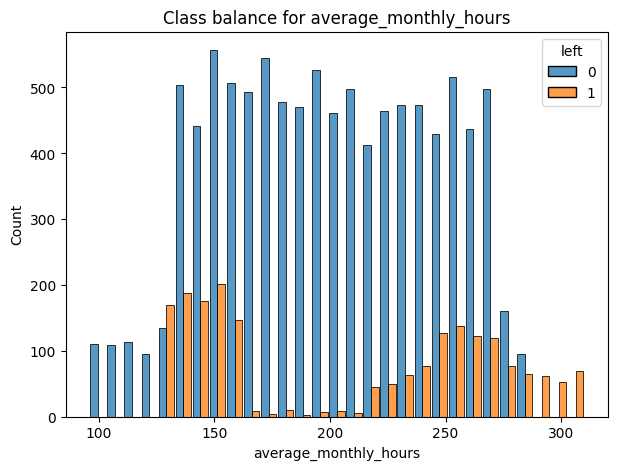

In [78]:
# correlation plot for "average_monthly_hours"
correlation_plot(df, column_name="average_monthly_hours", target="left")

    With average monthly hours around 130 - 160 the risk that employees make "left" decision is incresed    
    Similarly with  average monthly hours around 230 - 280 the risk that employees make "left" decision is also incresed    
    Adding even more hours leads to definite "left" decision

    It is understandable, that employees have to choose right balance between work and personal life, so making lot of extra hours leads to "burning out" and eventually to "left" decision

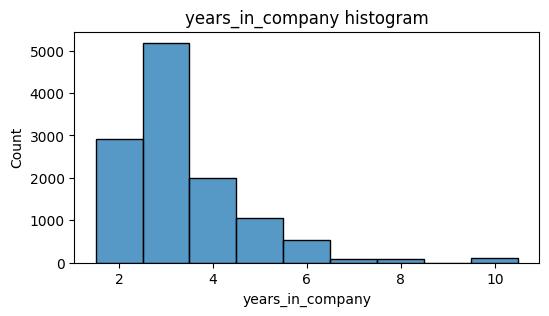

In [79]:
# Create a plot as needed
# histogram for "years_in_company":
histogram_plot(df, "years_in_company", discrete=True) # before rearranging outliers

    The "years_in_company" histogram is right skewed    
    We also can clearly see outliers (histogram for original data), issue we've already address earlier

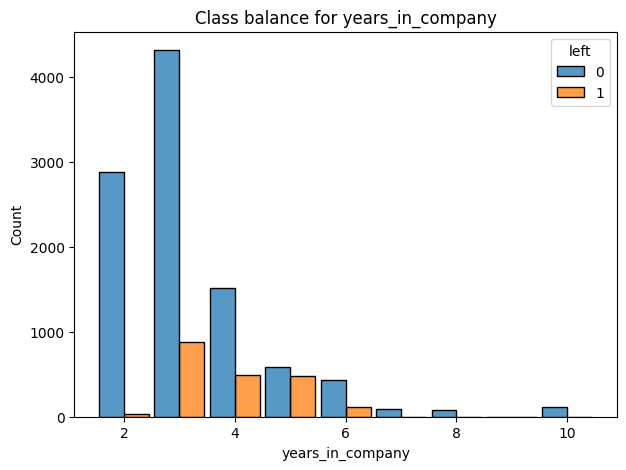

In [80]:
# correlation plot for "years_in_company"
correlation_plot(df, column_name="years_in_company", target="left", discrete=True)

    The highest level of risk to quit for the employee who works from three to five years with the number of such employee decreasing with the maximum at three years

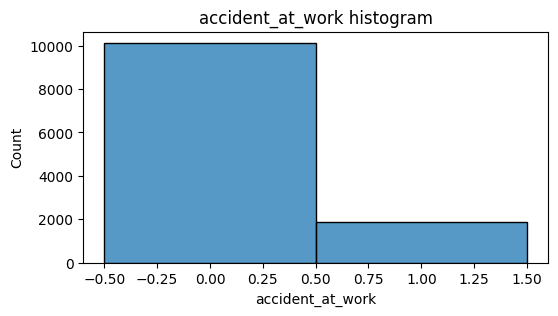

In [81]:
# Create a plot as needed
# histogram for "accident_at_work":
histogram_plot(df, "accident_at_work", discrete=True)

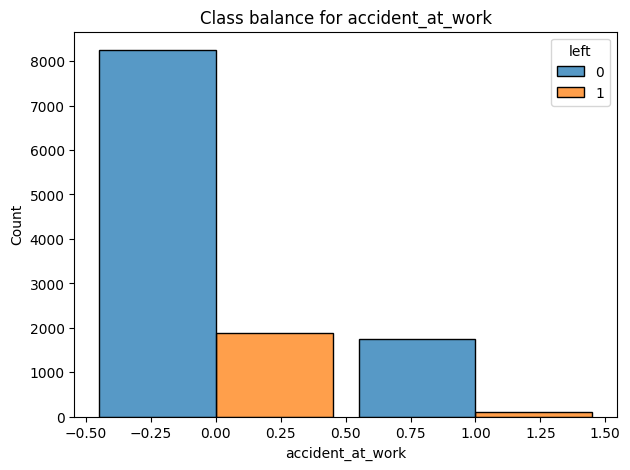

In [82]:
# correlation plot for "accident_at_work"
correlation_plot(df, column_name="accident_at_work", target="left", discrete=True)

     The proportion of employee with and without accident seems the same

     As we can see in "accident_at_work" histogram, the class is imbalanced with just about 2000 cases vs 10000 no cases

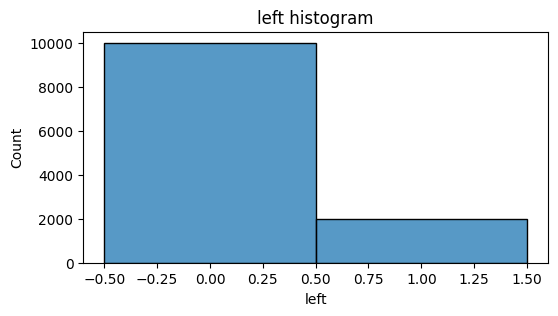

In [83]:
# Create a plot as needed
# histogram for "left":
histogram_plot(df, "left", discrete=True)

     Similarly, our target variable ("left") histogram is imbalanced with just about 2000 cases vs 10000 no cases

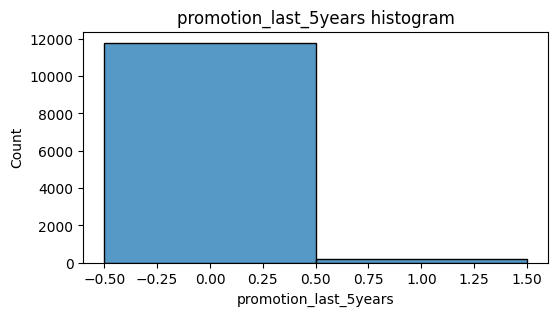

In [84]:
# Create a plot as needed
# histogram for "promotion_last_5years":
histogram_plot(df, "promotion_last_5years", discrete=True)

    In this case ("promotion_last_5years" histogram) class imbalance even more, just about 200 cases vs almost 12000 cases

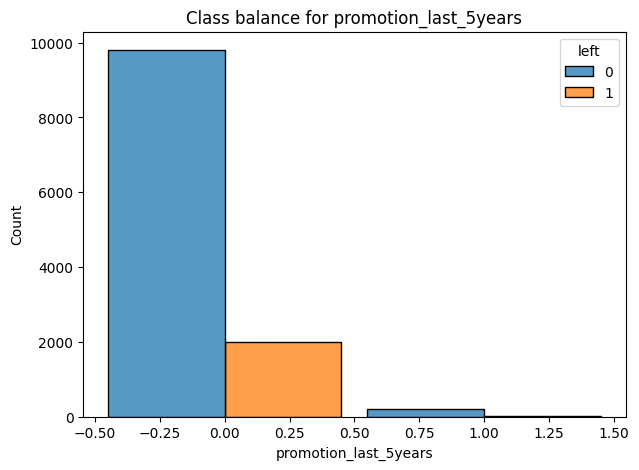

In [85]:
# correlation plot for "promotion_last_5years"
correlation_plot(df, column_name="promotion_last_5years", target="left", discrete=True)

    This plot suggest that having/no having promotion have little effect on employee's "left" decision

department
sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: proportion, dtype: float64


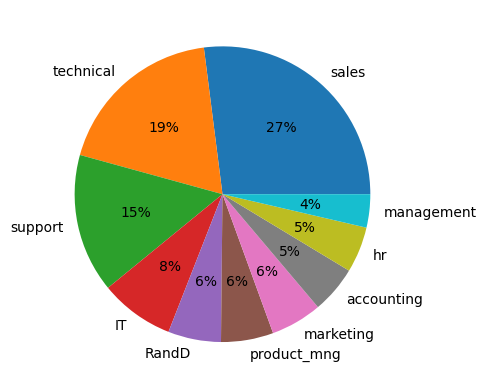

In [30]:
pie_data = df1["department"].value_counts(normalize=True)
print(pie_data)
plt.pie(pie_data, labels=pie_data.index, autopct='%.0f%%');

    Pie chart depics distribution of the employees between different departments
    Let's see if how is belonging to the certaing department related to employee's left the company

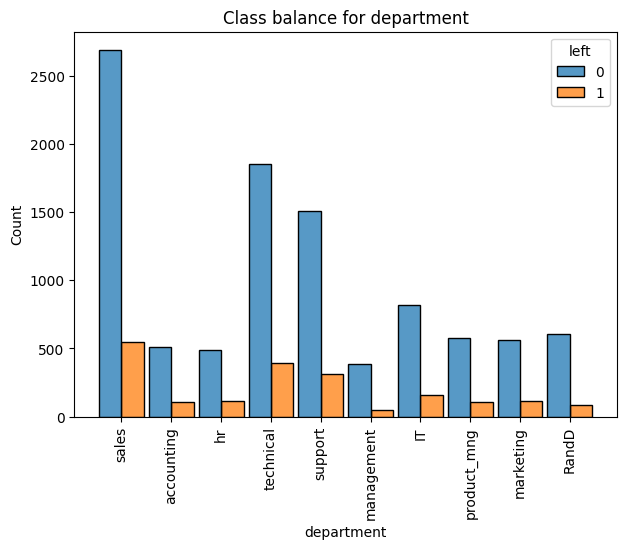

In [91]:
# correlation plot for "promotion_last_5years"
plt.figure(figsize=(7,5))
g = sns.histplot(data=df,
                x="department",
                hue="left",
                multiple='dodge',
                shrink=0.9,
                discrete=True)
plt.title(f"Class balance for department");
plt.xticks(rotation=90);

    Lets check where the number of employees who left the company regarding department they belong to:

In [31]:
# Create list of all departments
departments_columns = ["department_IT", "department_RandD", "department_accounting",
                       "department_hr", "department_management", "department_marketing",
                       "department_product_mng", "department_sales", "department_support",
                       "department_technical"]
# print the comment text
print("Number of employee who left the company from different department")

# create a dictionary where key is department name and the value is number of employee in that department
department_left = {department : (df2[df2[department] == 1]["left"].sum()) for department in departments_columns}

# create Dataframe and rename the column
department_left = pd.DataFrame.from_dict(department_left, orient='index')
department_left.columns = ["left"]

# add percentage column for better understanding and sort values in descending order
department_left["percentage"] = (department_left["left"] / department_left["left"].sum()).round(2)
department_left.sort_values(by=["left"], ascending=False)

Number of employee who left the company from different department


,left,percentage
department_sales,550,0.28
department_technical,390,0.20
department_support,312,0.16
department_IT,158,0.08
department_hr,113,0.06
department_marketing,112,0.06
department_product_mng,110,0.06
department_accounting,109,0.05
department_RandD,85,0.04
department_management,52,0.03


    As we can see the most affected departments are: sales department, technical department and support department

salary_level
low       5740
medium    5261
high       990
Name: count, dtype: int64


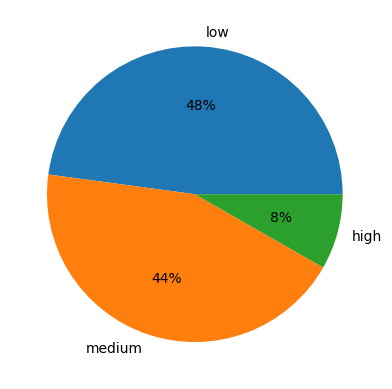

In [32]:
salary = df1["salary_level"].value_counts()
print(salary)
plt.pie(salary, labels=salary.index, autopct='%.0f%%');

    The proportion seems to dysplay real distribution in the company with most of the employees with low or medium level of the salary and just little percent with high salary represent high level managenent

    Let's see if we have some tendency to quit dependig on salary level:

In [33]:
# "Low" salary - proportion stay/leave
print("Low salary level")
print(df[df1["salary_level"] == "low"]["left"].value_counts(normalize=True))

# "Medium" salary - proportion stay/leave
print("\nMedium salary level")
print(df[df1["salary_level"] == "medium"]["left"].value_counts(normalize=True))

# "High" salary - proportion stay/leave
print("\nHigh salary level")
print(df[df1["salary_level"] == "high"]["left"].value_counts(normalize=True))

Low salary level
left
0    0.79547
1    0.20453
Name: proportion, dtype: float64

Medium salary level
left
0    0.85383
1    0.14617
Name: proportion, dtype: float64

High salary level
left
0    0.951515
1    0.048485
Name: proportion, dtype: float64


    Interesting that even employee with high level of salary left the company although (95/5) less than with medium salary (85/15) and much less than with low salary (80/20)

### Insights

What insights can you gather from the plots you created to visualize the data?

    - There are 83% stay and 17% who left, the class is imbalanced, we need to keep this proportion through all further tasks   
    - The proportion of the employees who left is kind of similar to the proportion of the employee who have an accident at work. This can be related events, although correlation matrix did not show high correlation between these two features
    - The level of salary seems not very affected if employee left or stay, although this proportion is bigger for employee with low salary level (80% vs 20%), which is not surprise   
    - The most affected departments are: sales department, technical department and support department. These department has the most employees decided to leave the company
    - The highest level of risk to quit for the employee who works from three to five years with the number of such employee decreasing with the maximum at three years 
    - 40% self satisfactory level may suggest tendency to “left” decision       
    - It is understandable, that employees have to choose right balance between work and personal life, so making lot of extra hours leads to "burning out" and eventually to "left" decision   
    - The balance between to little and too much projects for one employee is between 3 - 5 projects. Future increasing number of projects for particular employee will lead to “left” decision

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





In [43]:
df1.shape

(11991, 10)

    Regarding logic regression assumption:  
    - Linearity: can be only checked after the model is built. We will check this assumption later 
    - Independent observation: we assume that the data was collected independently and employees did not influence each other answers. Assumption is met    
    - No multicollinearity: This assumption was checked earlier. Assumption is met  
    - No extreme outliers: Outliers issue was addressed earlier. Assumption is met

    Others assumption is not highlighted as mandatoty, although:
    - Outcome variable is categorical: our target variable binary and has just two possible outcome: 0 (negative class) and 1 (positive class), in oher words: two categories. Assumption is met    
    - Sufficiently large sample size: large or small is kind of aurgable measure, as we do not know exactly what we can believe sufficiently large and what not. After duplicated rows were deleted, this dataset have 11991 rows and 10 columns (before one-hot encoding) which can be thought as sufficient (>> 30). Assumption is met

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

        Nothing extra ordinary
- Which independent variables did you choose for the model and why?

        For this task we will keep all available features as they seems corelated with target vatiable.     
        Later it is possible to remode some minor features
- Are each of the assumptions met?

        Most assumptions are met. Although Linearity was checked after model is built and it is not really clear if correlation on the scatterplot can be strickly interpreted as linear
- How well does your model fit the data?

        Logistic Regression shows really poor results. The Recall score 20%, the accuracy score worse than dummy Classifier with major class strategy
- Can you improve it? Is there anything you would change about the model?
        
        One approach is to scale the features, although this also did not get desired result    
        We also can reduce number of features and see if this will lead to any improvements (backward elimination strategy)
        We also can try rebalanced data with one of possible strategy to make it more class balanced    
        The alternative approach is to try machine learning models to see if they can perform better on this dataset    
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

  [Logistic Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)   
  [Random Forest documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)         
  [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/)
        
- Do you have any ethical considerations in this stage?

        There is no ethical consideration for this dataset. 


### Identify the type of prediction task.

    This is binary classification task

### Identify the types of models most appropriate for this task.

    Classifier will be good for this task   
    We will build Logistic regression, Random Forest and CGBoost models 
    Based on the score we will chose model with the highest score as our final model

### Modeling

Add as many cells as you need to conduct the modeling process.

    Split the data

In [7]:
# split the data on the train and test part, remembering keeping original dataset class proportion

# define dependent variable (y):
y = df2["left"]

# define independent variables X (features):
X = df2.drop("left", axis=1)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

In [19]:
# Create a dictionary of hyperparameters to tune
log_reg_params = {"C":[0.1, 0.5, 1.0, 10, 40, 100, 150],
                  "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
                  "max_iter" : [400, 500]}

# Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# Initiate Logistic Regression model
log_reg = LogisticRegression() 

log_reg_model = GridSearchCV(log_reg, param_grid=log_reg_params, scoring=scoring, cv=5, refit="recall", n_jobs=-1)

In [20]:
#  Fit the model
# This cell take about 2 min to run
log_reg_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0, 10, 40, 100, 150],
                         'max_iter': [400, 500],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

    Let's save the model

In [37]:
# Pickle the model (saving the model)
with open('logistic_regression.pickle', 'wb') as to_write:
    pickle.dump(log_reg_model, to_write)

In [8]:
# Open pickled model
# use this cell not to calculate the model again
with open('logistic_regression.pickle', 'rb') as to_load:
    log_reg_model = pickle.load(to_load) 

In [21]:
# Model best score (Recall)
log_reg_model.best_score_

0.2033832140533507

In [138]:
pd.DataFrame(log_reg_model.best_estimator_.coef_, columns=X_train.columns).T


,0
satisfaction_level,-3.681521
last_evaluation,0.536238
number_of_projects,-0.352632
average_monthly_hours,0.003708
years_in_company,0.754138
accident_at_work,-1.458264
promotion_last_5years,-1.079777
department_IT,-0.159915
department_RandD,-0.603321
department_accounting,-0.090521


In [143]:
# Logistic Regression intercept parameter
log_reg_model.best_estimator_.intercept_

array([-1.67559856])

In [22]:
# Model best parameters
log_reg_model.best_params_

{'C': 150, 'max_iter': 400, 'solver': 'lbfgs'}

In [23]:
def get_test_scores(model_name:str, preds, y_test_data):

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model_name': [model_name],
                          'Accuracy': [accuracy],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1_score': [f1],
                          })

    return table

In [24]:
y_pred_train = log_reg_model.best_estimator_.predict(X_train)
result_train = get_test_scores("Logistic Regression", y_pred_train, y_train)
result_train

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.825063,0.442177,0.204018,0.27921


In [25]:
y_pred = log_reg_model.best_estimator_.predict(X_test)
result = get_test_scores("Logistic Regression", y_pred, y_test)
result

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.823677,0.434555,0.208543,0.281834


    The score is worse than dummy_model with majority class strategy (score = 0.833959)
    So our model failed to identify right pattern 
    We need to improve our results

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1893,  108],
       [ 315,   83]], dtype=int64)

    As we can see, the model failed to identified positive class or in our case predict when employee decide to leave te company

    Before we proceed with alternative aproach (machine learning model) let's see that Linear assumption is met

In [9]:
# 0 Get the predicted probabilities of the training data
y_train_pred = log_reg_model.best_estimator_.predict_proba(X_train)

# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data["logit"] = [np.log((y_train_pred[i][1] / y_train_pred[i][0])) for i in range(len(y_train_pred))]
logit_data.head()

,satisfaction_level,employee_performance,number_of_projects,average_monthly_hours,years_in_company,accident_at_work,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_level_high,salary_level_low,salary_level_medium,logit
2041,0.98,0.91,4,240,3,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,-2.826384
10444,0.63,0.89,3,239,3,0,0,True,False,False,False,False,False,False,False,False,False,False,False,True,-1.774558
2030,0.85,0.59,3,235,3,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False,-2.225137
11606,0.56,0.39,3,106,5,0,0,False,False,False,False,True,False,False,False,False,False,True,False,False,-2.418617
2008,0.50,0.75,6,127,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False,-2.308645


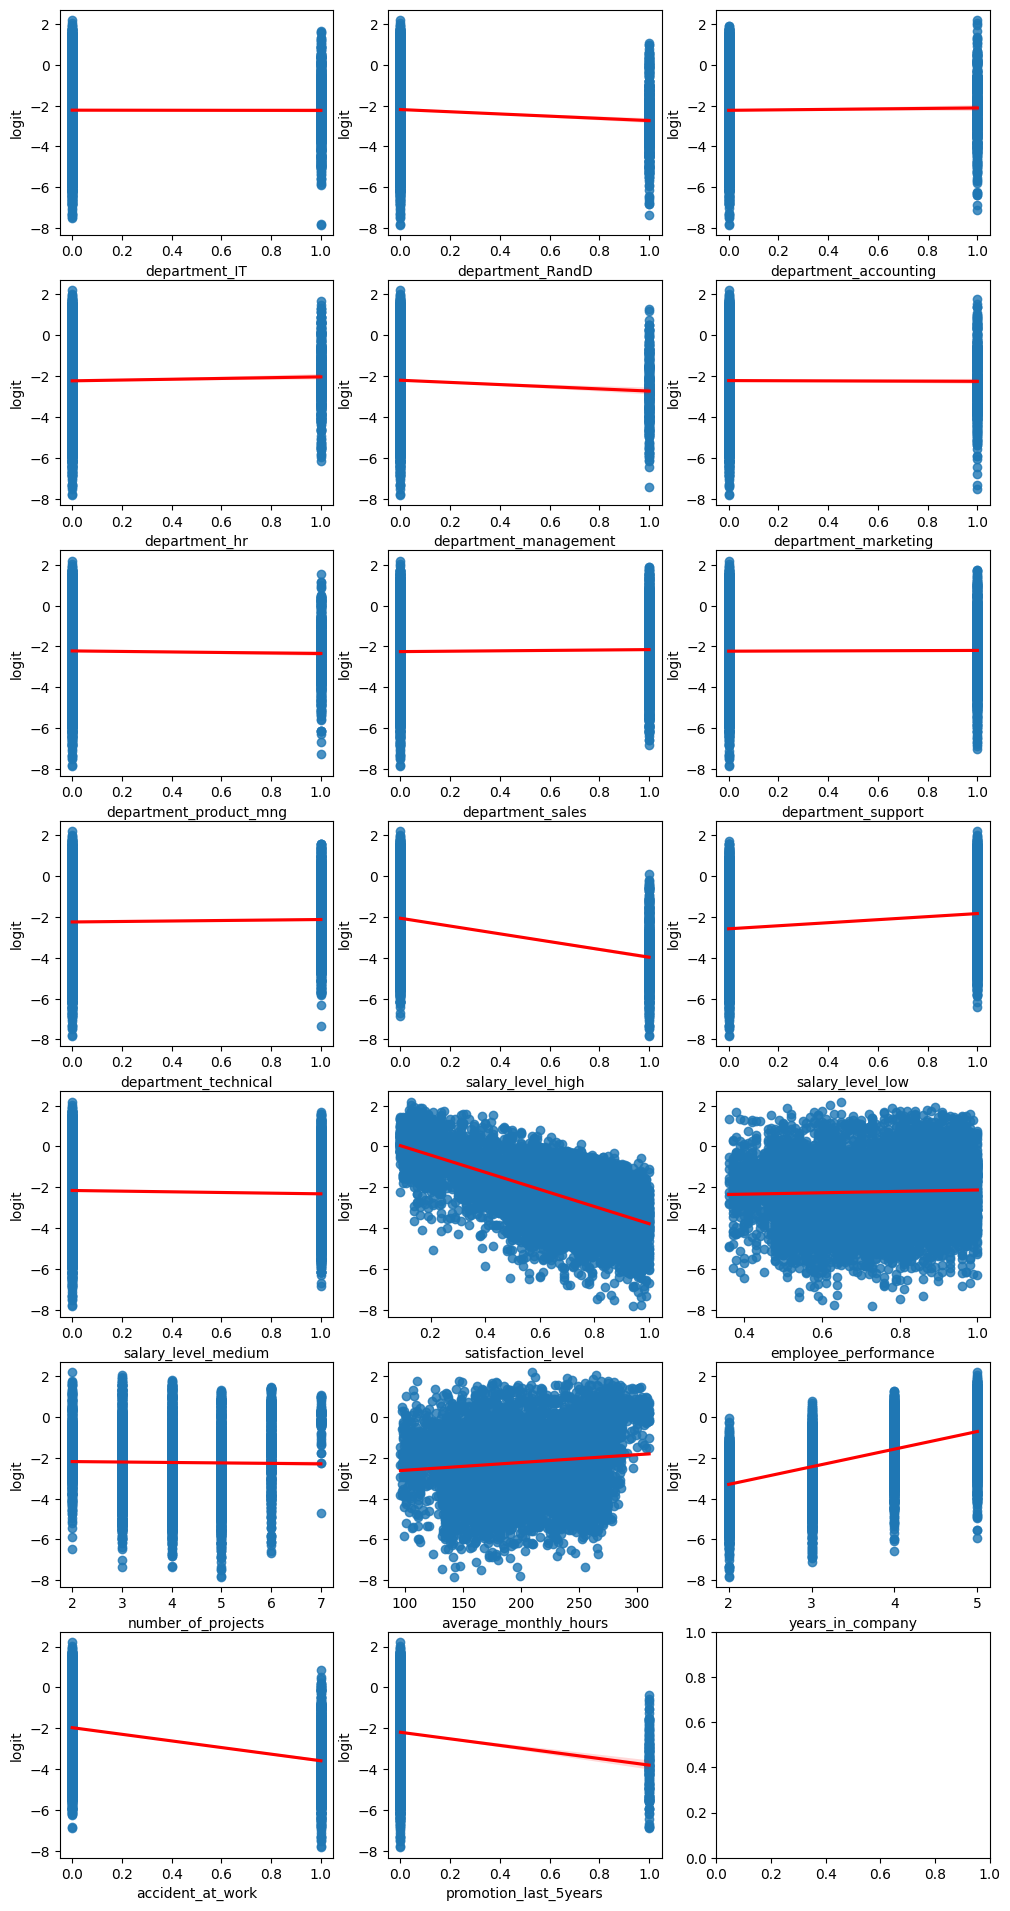

In [10]:
# Let's plot regplot for each variable:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(12,24))
sns.regplot(data=logit_data, x="department_IT", y="logit", line_kws={'color':'red'}, ax=ax[0][0]);
sns.regplot(data=logit_data, x="department_RandD", y="logit", line_kws={'color':'red'}, ax=ax[0][1]);
sns.regplot(data=logit_data, x="department_accounting", y="logit", line_kws={'color':'red'}, ax=ax[0][2]);
sns.regplot(data=logit_data, x="department_hr", y="logit", line_kws={'color':'red'}, ax=ax[1][0]);
sns.regplot(data=logit_data, x="department_management", y="logit", line_kws={'color':'red'}, ax=ax[1][1]);
sns.regplot(data=logit_data, x="department_marketing", y="logit", line_kws={'color':'red'}, ax=ax[1][2]);
sns.regplot(data=logit_data, x="department_product_mng", y="logit", line_kws={'color':'red'}, ax=ax[2][0]);
sns.regplot(data=logit_data, x="department_sales", y="logit", line_kws={'color':'red'}, ax=ax[2][1]);
sns.regplot(data=logit_data, x="department_support", y="logit", line_kws={'color':'red'}, ax=ax[2][2]);
sns.regplot(data=logit_data, x="department_technical", y="logit", line_kws={'color':'red'}, ax=ax[3][0]);
sns.regplot(data=logit_data, x="salary_level_high", y="logit", line_kws={'color':'red'}, ax=ax[3][1]);
sns.regplot(data=logit_data, x="salary_level_low", y="logit", line_kws={'color':'red'}, ax=ax[3][2]);
sns.regplot(data=logit_data, x="salary_level_medium", y="logit", line_kws={'color':'red'}, ax=ax[4][0]);
sns.regplot(data=logit_data, x="satisfaction_level", y="logit", line_kws={'color':'red'}, ax=ax[4][1]);
sns.regplot(data=logit_data, x="employee_performance", y="logit", line_kws={'color':'red'}, ax=ax[4][2]);
sns.regplot(data=logit_data, x="number_of_projects", y="logit", line_kws={'color':'red'}, ax=ax[5][0]);
sns.regplot(data=logit_data, x="average_monthly_hours", y="logit", line_kws={'color':'red'}, ax=ax[5][1]);
sns.regplot(data=logit_data, x="years_in_company", y="logit", line_kws={'color':'red'}, ax=ax[5][2]);
sns.regplot(data=logit_data, x="accident_at_work", y="logit", line_kws={'color':'red'}, ax=ax[6][0]);
sns.regplot(data=logit_data, x="promotion_last_5years", y="logit", line_kws={'color':'red'}, ax=ax[6][1]);

    Linearity assumption is met, discrete variable are not linear by definition, the rest three variables is linear with logit of the target variable

    Let's see if machine learning models will perform better

RANDOM FOREST

In [27]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

cv_params = {"max_depth" : [2,5,10,50],
             "max_features" : [0.3, 0.4, 0.8],
             "min_samples_split" : [0.001, 0.01, 0.05, 0.3],
             "n_estimators" : [75, 100, 125, 150]}

# 3. Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit="recall")

In [28]:
# Fit the Grid Search (this cell will take around 6 mins to complete)
rf1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 50],
                         'max_features': [0.3, 0.4, 0.8],
                         'min_samples_split': [0.001, 0.01, 0.05, 0.3],
                         'n_estimators': [75, 100, 125, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

    Saving the model

In [34]:
# Pickle the model (saving the model)
with open('random_forest_classifier.pickle', 'wb') as to_write:
    pickle.dump(rf1, to_write)

In [35]:
# Open pickled model (random forest model) in order not to calculate it again:
# use this cell not to calculate the model again
with open('random_forest_classifier.pickle', 'rb') as to_load:
    rf1 = pickle.load(to_load)

In [36]:
# Best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 0.8,
 'min_samples_split': 0.05,
 'n_estimators': 75}

In [39]:
#  Best score
rf1.best_score_

0.9221505885136334

In [40]:
all_result = pd.DataFrame(rf1.cv_results_)
actual_metrics = {"accuracy" : "mean_test_accuracy",
                      "precision":"mean_test_precision",
                      "recall":"mean_test_recall",
                      "f1" : "mean_test_f1"}
best_metrics =  all_result.iloc[all_result[actual_metrics["recall"]].idxmax(), :]
table = pd.DataFrame({"Model_name" : "Random Forest",
                       "Accuracy" : [best_metrics[actual_metrics["accuracy"]]],
                       "Precision" : [best_metrics[actual_metrics["precision"]]],
                       "Recall" : [best_metrics[actual_metrics["recall"]]],
                       "F1_score" : [best_metrics[actual_metrics["f1"]]]})
table

,Model_name,Accuracy,Precision,Recall,F1_score
0,Random Forest,0.96518,0.875059,0.922151,0.897921


In [41]:
# Get score for Train data
y_pred_train_rf0 = rf1.best_estimator_.predict(X_train)
rf_result_train = get_test_scores("Random Forest", y_pred_train_rf0, y_train)
# Add score to the result table
result_train_all = pd.concat([result_train, rf_result_train], axis=0).reset_index(drop=True)
result_train_all

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.825063,0.442177,0.204018,0.279210
1,Random Forest,0.967681,0.885749,0.924670,0.904791


    On the train data Randon Forest show really good result. Recall score is 92.46%

In [42]:
# Get score for Test data
y_pred_test_rf0 = rf1.best_estimator_.predict(X_test)
rf_result_test = get_test_scores("Random Forest", y_pred_test_rf0, y_test)
# Add score to the result table
result_all = pd.concat([result, rf_result_test], axis=0).reset_index(drop=True)
result_all

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.823677,0.434555,0.208543,0.281834
1,Random Forest,0.969154,0.893204,0.924623,0.908642


    As we can see the model performance on the test data is just slightly worse. But in general score 92.46% for Recall is a good result, especcialy when Logistic regression managed to achieve just 20.85%

    Lets build confusion matrix for random forest

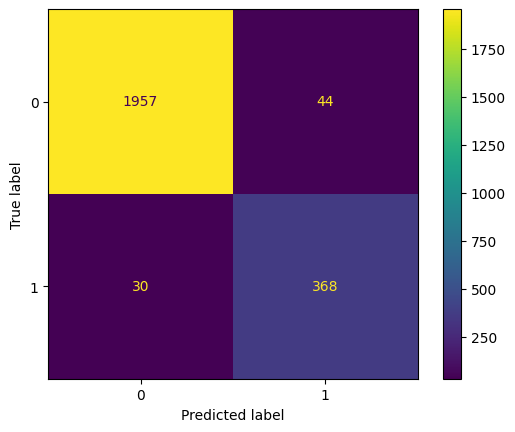

In [43]:
cm = confusion_matrix(y_test, y_pred_test_rf0, labels = rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf1.classes_)
disp.plot();

    From confusion matrix we can see, that there were 74 incorrect results in total     
    44 out of 2001 were falsly identify as leaving, where as they are employees who not consider to leave the company       
    30 out of 398 were falsly identify as not leaving and actually left the company
    The result is very sufficient

    Now let's see the most important features

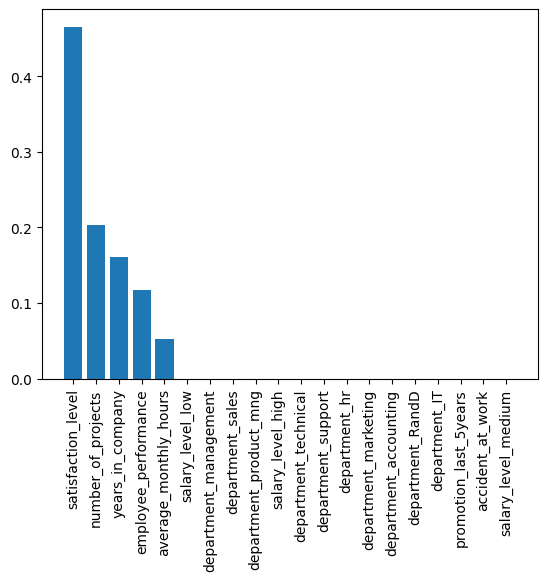

In [44]:
# identify importances and create panda's Series
importances = rf1.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# plot te importances
plt.bar(x=forest_importances.index, height=forest_importances)
plt.xticks(rotation=90);

    - This graph confirms our suggestion that satisfactory, number of projects and years in company have big impact on the employee's decision to leave the company    
    - Surprisignly belonging to any particular department do not impact on the decision to leave  
    - It is also confirms that salary level has no or little impact on "left" decision

XGBOOST MODEL

Let's build XGBoost model to see if we can do even better than results we got from Random Forest

In [47]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective="binary:logistic", random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {"max_depth" :[2,5,10,50],
             "min_child_weight" : [0.1, 0.3, 0.5],
             "learning_rate" : [0.01, 0.3, 0.5],
             "n_estimators" : [50, 75, 100, 125, 150]}

# 3. Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit="recall")

In [48]:
# Fit the Grid Search (this cell will take around 2 mins to complete)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.3, 0.5],
                         'max_depth': [2, 5, 10, 50],
                         'min_child_weight': [0.1, 0.3, 0.5],
                         'n_estimators': [50, 75, 100, 125, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

    Saving the model

In [49]:
# Pickle the model (saving the model)
with open('xgboost_classifier.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

In [50]:
# Open pickled model (random forest model) in order not to calculate it again:
# use this cell not to calculate the model again
with open('xgboost_classifier.pickle', 'rb') as to_load:
    xgb_cv = pickle.load(to_load)

In [53]:
# Best score
xgb_cv.best_score_

0.924043295676347

In [54]:
# Best parameters
xgb_cv.best_params_

{'learning_rate': 0.5,
 'max_depth': 2,
 'min_child_weight': 0.5,
 'n_estimators': 150}

In [55]:
# Get score for Train data
y_pred_train_xgb0 = xgb_cv.best_estimator_.predict(X_train)
xgb_result_train = get_test_scores("XGBoost", y_pred_train_xgb0, y_train)
# Add score to the result table
result_train_all = pd.concat([result_train_all, xgb_result_train], axis=0).reset_index(drop=True)
result_train_all

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.825063,0.442177,0.204018,0.279210
1,Random Forest,0.967681,0.885749,0.924670,0.904791
2,XGBoost,0.983736,0.969301,0.931576,0.950064


    XGBoost performance on the train data is even better with Recall is equial 93.16%

In [70]:
# Get score for Test data
y_pred_test_xgb0 = xgb_cv.best_estimator_.predict(X_test)
xgb_result_test = get_test_scores("XGBoost", y_pred_test_xgb0, y_test)
# Add score to the result table
result_all = pd.concat([result_all, xgb_result_test], axis=0).reset_index(drop=True)
result_all

,Model_name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.823677,0.434555,0.208543,0.281834
1,Random Forest,0.969154,0.893204,0.924623,0.908642
2,XGBoost,0.979158,0.943878,0.929648,0.936709


    Expectently the score for the test data is a litle bit down in comparison with train data result, although the score still the best from the three models: Recal is equal 92.96%

    Lets build confusion matrix for XGBoost model

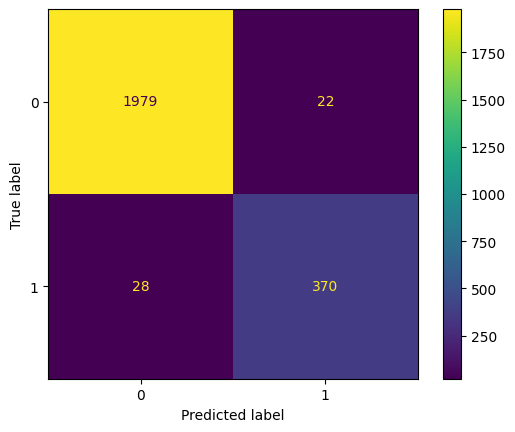

In [57]:
cm1 = confusion_matrix(y_test, y_pred_test_xgb0, labels = xgb_cv.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = xgb_cv.classes_)
disp1.plot();

    From confusion matrix we can see, that there were just 50 incorrect results in total (74 for Random Forest)     
    22 out of 2001 were falsely identify as leaving, where as they are employees who not consider to leave the company (twice less than with Random Forest)      
    28 out of 398 were falsely identify as not leaving and actually left the company (2 less than Random Forest model)
    The result is very sufficient and this model will be recommended as a "champion" and for the real case usage

    Now let's see what is the most important features with XGBoost model

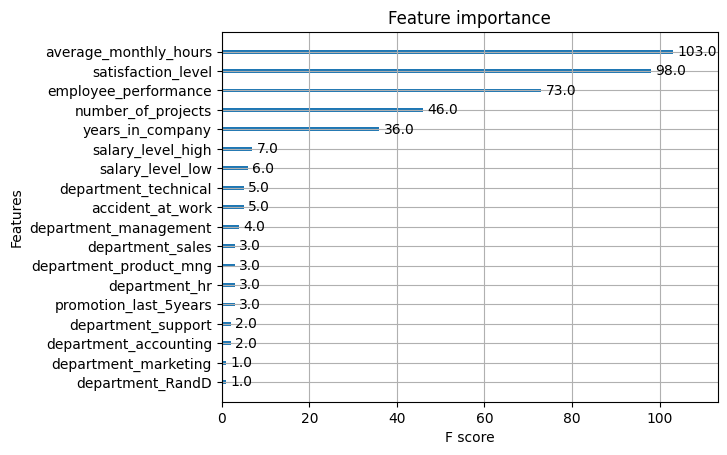

In [72]:
#  plot features importance
plot_importance(xgb_cv.best_estimator_);

    - For XGBoos model the most important feature is average monthly hours, following by satisfactory level, employee performance, number of projects and years spent in the company
    
    - Average monthly hours confirm our preliminary suggestion that this feature has great impact on the "leave" decision and little hours leads to "boredom" of the employee whereas great amount of hours lead to employee's "burning out"

    - Satisfactory level was also one we noted during EDA as well as employee performance and number of projects. So, we have no surprise here and all followed our expectations

    - Belonging to one or another department have little effect on "leave" decision, as well as having promotion

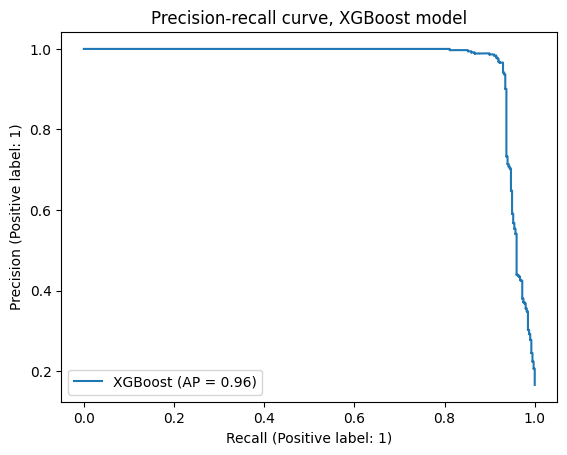

In [77]:
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model');

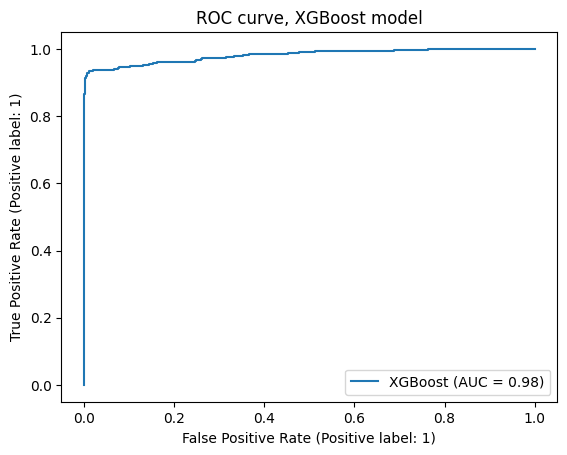

In [76]:
#  ROC curve, XGBoost model
rC = RocCurveDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('ROC curve, XGBoost model');

    XGBoost model showed best performance and was chosen as a final model recommended for production and real-case usage

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?

      For XGBoos model the most important feature is average monthly hours, following by satisfactory level, employee performance, number of projects and years spent in the company    
  
      Average monthly hours confirm our preliminary suggestion that this feature has great impact on the "leave" decision and little hours leads to "boredom" of the employee whereas great number of hours lead to employee's "burning out"
  
      Satisfactory level was also one we noted during EDA as well as employee performance and number of projects. So, we have no surprise here and all followed our expectations
  
      Belonging to one or another department have little effect on "leave" decision, as well as having promotion

- What business recommendations do you propose based on the models built?

      The XGBoost model performance is very good and can be recommended for usage in prediction if the employee decide to leave the company or not.         

      Both Precision (94.39%) and Recall (92.96%) were consistently high.      
       
      The model very successfully classified if the employee is going to leave the company or not. 
- What potential recommendations would you make to your manager/company?

      The model's most predictive features were average monthly hours, following by satisfactory level, employee performance, number of projects and years spent in the company     

      “average monthly hours”: it is important to keep “gold medium” as to little hours leads to "boredom" of the employee whereas great number of hours lead to employee's "burning out"

      “satisfactory level”: Extremely low (~0%), a little bit less than average (38% - 48%) and to optimistic (76% - 90%) are the notably values which can suggest that employee is required attention and encourage measure in order not to leave the company    
      
      “employee performance”: mediocre performance (48% - 58%) and extraordinary good performance (>80%) is the value for additional attention. Mediocre performance may suggest “burning out”, whereas great performance may required additional motivation for employee to stay and not to look after new job   

      “number of projects”: the balance between too little and too much projects for one employee is between 3 - 5 projects   

      “years spent in the company”: The highest level of risk to quit for the employee who works from three to five years with the number of such employee decreasing with the maximum at three years       

- Do you think your model could be improved? Why or why not? How?

      The current model performance is already sufficient, we can use it as is
- Given what you know about the data and the models you were using, what other questions could you address for the team?

      It will be important to ask domain experts why they believe this feature scores so highly in this model.    

      It will be helpful to have new data with employee who decided to leave company in order to improve balance in the target variable and improve model performance
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

  [Logistic Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)   
  [Random Forest documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)         
  [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/)
- Do you have any ethical considerations in this stage?

      There is no ethical consideration for this dataset



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

      The XGBoost model performance is very good and can be recommended for usage in prediction if the employee decide to leave the company or not.         

      Both Precision (94.39%) and Recall (92.96%) were consistently high. AUC is 98%     
       
      The model very successfully classified if the employee is going to leave the company or not. 

      The model's most predictive features were average monthly hours, following by satisfactory level, employee performance, number of projects and years spent in the company     

      “average monthly hours”: it is important to keep “gold medium” as to little hours leads to "boredom" of the employee whereas great number of hours lead to employee's "burning out"

      “satisfactory level”: Extremely low (~0%), a little bit less than average (38% - 48%) and to optimistic (76% - 90%) are the notably values which can suggest that employee is required attention and encourage measure in order not to leave the company    
      
      “employee performance”: mediocre performance (48% - 58%) and extraordinary good performance (>80%) is the value for additional attention. Mediocre performance may suggest “burning out”, whereas great performance may required additional motivation for employee to stay and not to look after new job   

      “number of projects”: the balance between too little and too much projects for one employee is between 3 - 5 projects   

      “years spent in the company”: The highest level of risk to quit for the employee who works from three to five years with the number of such employee decreasing with the maximum at three years       


### Conclusion, Recommendations, Next Steps

    The XGBoost model performed exceptionally well on the test holdout data.    
    
    Before deploying the model, it is recommended further evaluation using additional subsets of user data.      
    
    In addition, it is recommended monitoring the employees data and monitor model performance and its TOP important features in order to ensure that the model remains robust to fluctuations in its most predictive features.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.